# Amazon Fine Food Review With Random Forest
### We have used Random Forest to Evaluate Depth using Cross Validation Score 

In [247]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import string
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation
import graphviz
import os
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [248]:
conn = sqlite3.connect('final.sqlite')#Loading the Data set
final = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, conn)

In [249]:
final = final.sort_values('Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')#Sorting the data according to the Time in ascending order

In [250]:
x = final['CleanedText'].values[0:100000]#Taking 100K Values 
y = final['Score'].values[0:100000]

In [251]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = cross_validation.train_test_split( x, y, test_size=0.3, random_state=42)#Splitting the data into Test and Train

In [252]:
#Plot Confusion Matrix for the dataset
from sklearn.metrics import confusion_matrix
import itertools   
def plot_confusion_matrix(cm, classes,
      
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
     #else:
      #  print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [253]:
 def fn_random_forest(x_train, y_train,x_test, y_test):
# creating odd list of depth for decision tree
    myList = list(range(1,100))
    models = list(filter(lambda x: x % 5 == 0, myList))
    cv_scores = []
    accuracy_score_list = []
# perform 10-fold cross validation
    for val in models:
        rf = RandomForestClassifier(n_estimators=val, n_jobs=-1, class_weight='balanced')
        scores = cross_val_score(rf, x_train, y_train, cv=10, scoring='f1_weighted')
        cv_scores.append(scores.mean())


    for val in models:
        rf_optimal = RandomForestClassifier(n_estimators=val, n_jobs=-1, class_weight='balanced')
        rf_optimal.fit(x_train, y_train)
        pred = rf_optimal.predict(x_test)
        acc_bow = accuracy_score(y_test, pred)
        accuracy_score_list.append(acc_bow)
        optimal_models = models[cv_scores.index(max(cv_scores))]
        print('\nThe optimal Base Learner is %d.' % optimal_models)
        
        
        # plot misclassification error vs k
    plt.plot(models, cv_scores, label='CV Score')

    plt.xlabel('models')
    plt.ylabel('CV Score/ Accuracy')
    plt.grid()
    plt.legend()
    plt.show()
    print("the CV Score for each hyperparameter (Base_learner) value is : ", np.round(cv_scores,3))
    return optimal_models
    

In [254]:
def important_features(vectorizer,classifier,n):
    class_labels = classifier.classes_
    feature_names =vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.feature_importances_, feature_names),reverse=True)
    print("Important features in Decision Tree")
    for coef, feat in topn_class1[2:20]:
            
        return feat

# BOW
### Used Min DF to reduce Dimensions

In [255]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df = 10) #Vectorization for BOW
X_train = count_vect.fit_transform(x_train)# Fitting and training our dataset on train dataset
X_test = count_vect.transform(x_test)
print("Train Data Size: ",X_train.shape)
print("Test Data Size: ",X_test.shape)


Train Data Size:  (70000, 2331)
Test Data Size:  (30000, 2331)



The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.


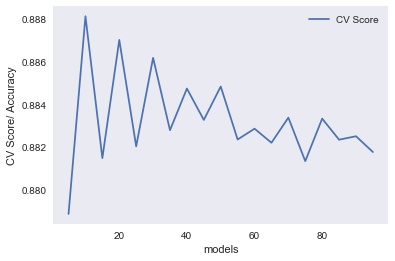

the CV Score for each hyperparameter (Base_learner) value is :  [0.879 0.888 0.881 0.887 0.882 0.886 0.883 0.885 0.883 0.885 0.882 0.883
 0.882 0.883 0.881 0.883 0.882 0.883 0.882]


In [256]:
optimal_models = fn_random_forest(X_train,y_train,X_test,y_test)

In [257]:
rf_optimal = RandomForestClassifier(n_estimators=optimal_models, n_jobs=-1, class_weight='balanced')
# fitting the model
rf_optimal.fit(X_train, y_train)
# predict the response
pred = rf_optimal.predict(X_test)
# evaluate accuracy
acc_bow = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the decision tree classifier for depth = %d is %f%%' % (optimal_models, acc_bow))
print('\nThe error of the decision tree classifier for depth = %d is %f%%' % (optimal_models,100-acc_bow))


The accuracy of the decision tree classifier for depth = 10 is 90.360000%

The error of the decision tree classifier for depth = 10 is 9.640000%


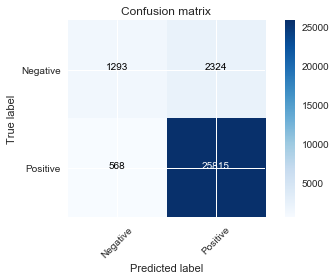

In [258]:
plot_confusion_matrix(confusion_matrix(y_test, pred), classes=["Negative","Positive"])

In [259]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, pred, average='weighted')#Generating Values for Precision,Recall and Fscore

(0.8905691775260371, 0.9036, 0.8897016377443907, None)

In [260]:
test = rf_optimal.feature_importances_
imp = test.argsort()
wc = np.take(count_vect.get_feature_names(),imp[1:50])
s1= str(wc)

# Important Feaures in WordCloud

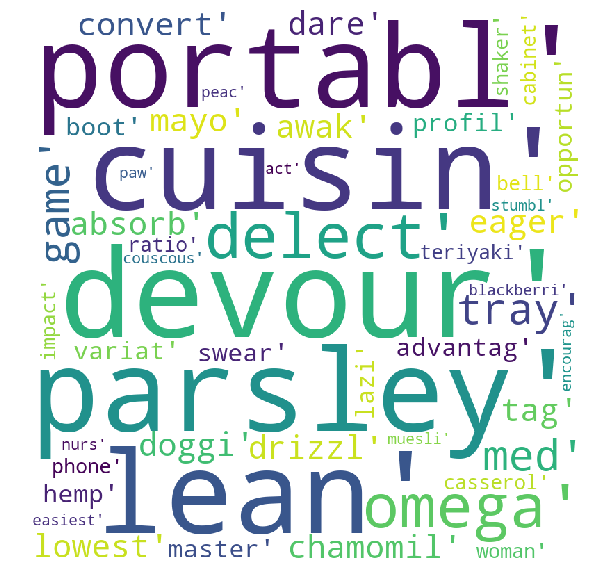

In [261]:
from wordcloud import WordCloud, STOPWORDS
    
wordcloud = WordCloud(width = 800, height = 800, background_color ='white',stopwords = stopwords, min_font_size = 10).generate(s1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# TFIDF

In [262]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)#Vectorizering the data
X_train_tfidf = tf_idf_vect.fit_transform(x_train)
X_test_tfidf = tf_idf_vect.transform(x_test)
print("the type of count vectorizer ",type(X_train_tfidf))
print("Train Data Size: ",X_train_tfidf.shape)
print("Test Data Size: ",X_test_tfidf.shape)


the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
Train Data Size:  (70000, 3933)
Test Data Size:  (30000, 3933)



The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.

The optimal Base Learner is 20.


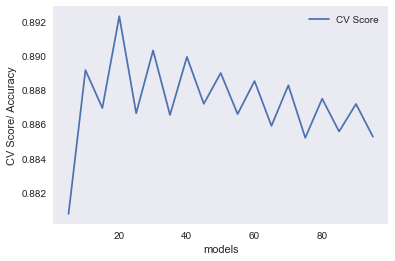

the CV Score for each hyperparameter (Base_learner) value is :  [0.881 0.889 0.887 0.892 0.887 0.89  0.887 0.89  0.887 0.889 0.887 0.889
 0.886 0.888 0.885 0.887 0.886 0.887 0.885]


In [263]:
optimal_models = fn_random_forest(X_train_tfidf,y_train,X_test_tfidf,y_test)

In [264]:
rf_optimal_tfidf = RandomForestClassifier(n_estimators=optimal_models, n_jobs=-1, class_weight='balanced')
# fitting the model
rf_optimal_tfidf.fit(X_train_tfidf, y_train)
# predict the response
pred_tfidf = rf_optimal_tfidf.predict(X_test_tfidf)
# evaluate accuracy
acc_tfidf = accuracy_score(y_test, pred_tfidf) * 100
print('\nThe accuracy of the decision tree classifier for depth = %d is %f%%' % (optimal_models, acc_tfidf))
print('\nThe error of the decision tree classifier for depth = %d is %f%%' % (optimal_models,100-acc_tfidf))


The accuracy of the decision tree classifier for depth = 20 is 91.093333%

The error of the decision tree classifier for depth = 20 is 8.906667%


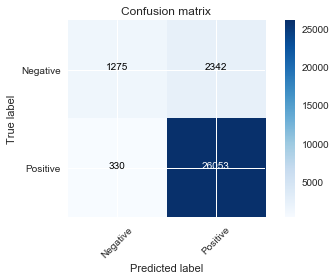

In [265]:
plot_confusion_matrix(confusion_matrix(y_test, pred_tfidf), classes=["Negative","Positive"])

In [266]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, pred_tfidf, average='weighted')#Generating Values for Precision,Recall and Fscore

(0.9026755376067154, 0.9109333333333334, 0.8954106647596483, None)

In [267]:
important_features(tf_idf_vect,rf_optimal_tfidf,20)


Important features in Decision Tree


'best'

In [268]:
test1 = rf_optimal_tfidf.feature_importances_
imp1 = test1.argsort()
wc1 = np.take(tf_idf_vect.get_feature_names(),imp[1:50])
s2= str(wc1)#Converting into string to feed into WordCloud

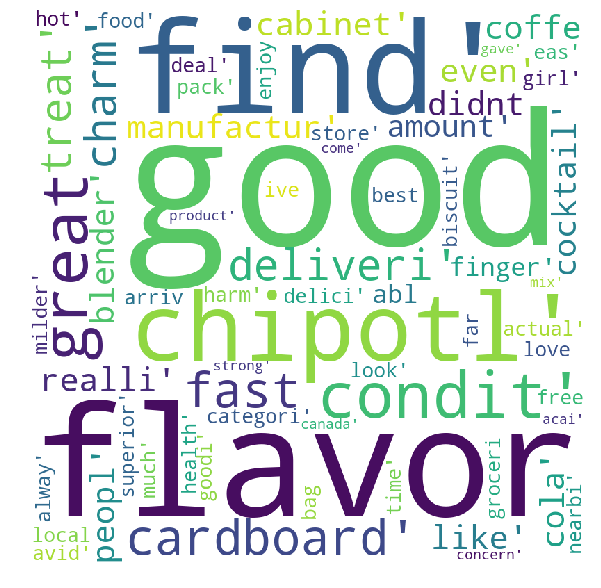

In [269]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(s2) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# AVGW2V

In [270]:
#Word 2 Vector for train corpus
list_of_sent_train=[]#Stored in a list
for sent in x_train:
    list_of_sent_train.append(sent.split())
    
w2v_model_train=Word2Vec(list_of_sent_train,min_count=5,size=50, workers=4)
print(w2v_model_train)

w2v_words_train = list(w2v_model_train.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words_train))
print("sample words ", w2v_words_train[0:50])

Word2Vec(vocab=10698, size=50, alpha=0.025)
number of words that occured minimum 5 times  10698
sample words  ['decid', 'roll', 'dice', 'bought', 'spring', 'onion', 'split', 'pea', 'soup', 'sinc', 'like', 'drink', 'wasnt', 'disappoint', 'littl', 'scare', 'first', 'time', 'order', 'food', 'type', 'item', 'amazon', 'sister', 'thought', 'crazi', 'someth', 'normal', 'dont', 'far', 'favorit', 'tri', 'bland', 'tast', 'compar', 'ambrosia', 'tomorrow', 'season', 'perfect', 'light', 'good', 'expect', 'come', 'cup', 'noodl', 'best', 'microwav', 'ever', 'know', 'might']


In [271]:
#Word 2 Vector for test corpus
list_of_sent_test=[]
for sent in x_test:
    list_of_sent_test.append(sent.split())
    
w2v_model_test=Word2Vec(list_of_sent_test,min_count=5,size=50, workers=4)
print(w2v_model_test)

w2v_words_test = list(w2v_model_test.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words_test))
print("sample words ", w2v_words_test[0:50])

Word2Vec(vocab=7458, size=50, alpha=0.025)
number of words that occured minimum 5 times  7458
sample words  ['like', 'organ', 'whole', 'grain', 'brown', 'rice', 'take', 'look', 'label', 'milk', 'product', 'two', 'thing', 'dont', 'often', 'see', 'find', 'togeth', 'one', 'made', 'favorit', 'far', 'three', 'boy', 'love', 'even', 'mix', 'unsweeten', 'soy', 'cut', 'sugar', 'high', 'recommend', 'anyon', 'want', 'need', 'avoid', 'dairi', 'that', 'posit', 'say', 'arent', 'lot', 'choic', 'decaf', 'tassimo', 'moment', 'make', 'brew', 'cup']


In [272]:
#train corpus
sent_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_train:
            #print(word)
            vec = w2v_model_train.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
print(len(sent_vectors_train[0]))

70000
50


In [273]:
#test Corpus
sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent_test: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_train:
    
            vec = w2v_model_train.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

30000
50



The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.


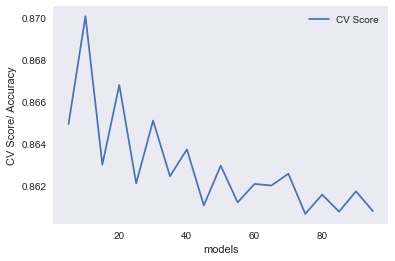

the CV Score for each hyperparameter (Base_learner) value is :  [0.865 0.87  0.863 0.867 0.862 0.865 0.862 0.864 0.861 0.863 0.861 0.862
 0.862 0.863 0.861 0.862 0.861 0.862 0.861]


In [274]:
optimal_models = fn_random_forest(sent_vectors_train,y_train,sent_vectors_test,y_test)

In [275]:
rf_optimal_w2v = RandomForestClassifier(n_estimators=optimal_models, n_jobs=-1, class_weight='balanced')
# fitting the model
rf_optimal_w2v.fit(sent_vectors_train, y_train)
# predict the response
pred_w2v = rf_optimal_w2v.predict(sent_vectors_test)
# evaluate accuracy
acc_w2v = accuracy_score(y_test, pred_w2v) * 100
print('\nThe accuracy of the decision tree classifier for depth = %d is %f%%' % (optimal_models, acc_w2v))
print('\nThe error of the decision tree classifier for depth = %d is %f%%' % (optimal_models,100-acc_w2v))


The accuracy of the decision tree classifier for depth = 10 is 89.010000%

The error of the decision tree classifier for depth = 10 is 10.990000%


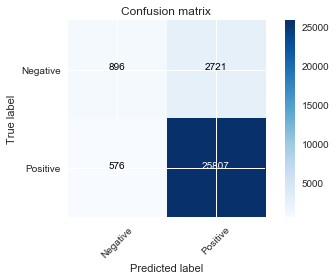

In [276]:
plot_confusion_matrix(confusion_matrix(y_test, pred_w2v), classes=["Negative","Positive"])

In [277]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, pred_w2v, average='weighted')#Generating Values for Precision,Recall and Fscore

(0.8689414075263966, 0.8901, 0.8690852442355326, None)

# TFIDF AVGW2V

In [278]:
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(x_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [279]:
tfidf_feat = tf_idf_vect.get_feature_names()#getting feature list

In [280]:
from tqdm import tqdm
tfidf_sent_vectors_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent_train): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_train:
            vec = w2v_model_train.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))#taking the dictionary to train words to plt vector. 
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_train.append(sent_vec)
    row += 1

print(len(tfidf_sent_vectors_train))
print(len(tfidf_sent_vectors_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [05:47<00:00, 201.17it/s]


70000
50


In [281]:
model = TfidfVectorizer(ngram_range=(1,2))
tf_idf_matrix = model.fit_transform(x_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_test = dict(zip(model.get_feature_names(), list(model.idf_)))

In [282]:
#test corpus
tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent_test): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_train:
            vec = w2v_model_train.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary_test[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1

print(len(tfidf_sent_vectors_test))
print(len(tfidf_sent_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [02:35<00:00, 192.35it/s]


30000
50



The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.

The optimal Base Learner is 10.


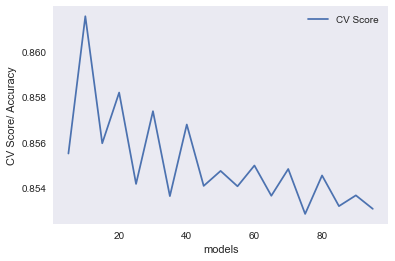

the CV Score for each hyperparameter (Base_learner) value is :  [0.856 0.862 0.856 0.858 0.854 0.857 0.854 0.857 0.854 0.855 0.854 0.855
 0.854 0.855 0.853 0.855 0.853 0.854 0.853]


In [283]:
optimal_models = fn_random_forest(tfidf_sent_vectors_train,y_train,tfidf_sent_vectors_test,y_test)

In [284]:
rf_optimal_avgtfidf = RandomForestClassifier(max_depth=optimal_models, class_weight='balanced')
# fitting the model
rf_optimal_avgtfidf.fit(tfidf_sent_vectors_train, y_train)
# predict the response
pred_avgtfidf = rf_optimal_avgtfidf.predict(tfidf_sent_vectors_test)
# evaluate accuracy
acc_w2vtfidf = accuracy_score(y_test, pred_avgtfidf) * 100
print('\nThe accuracy of the decision tree classifier for depth = %d is %f%%' % (optimal_models, acc_w2vtfidf))
print('\nThe error of the decision tree classifier for depth = %d is %f%%' % (optimal_models,100-acc_w2vtfidf))



The accuracy of the decision tree classifier for depth = 10 is 82.313333%

The error of the decision tree classifier for depth = 10 is 17.686667%


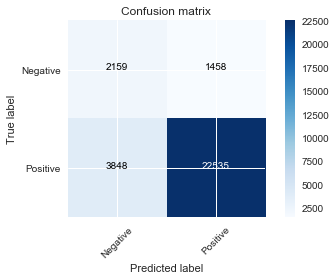

In [285]:
plot_confusion_matrix(confusion_matrix(y_test, pred_avgtfidf), classes=["Negative","Positive"])

In [286]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, pred_tfidf, average='weighted')#Generating Values for Precision,Recall and Fscore

(0.9026755376067154, 0.9109333333333334, 0.8954106647596483, None)

| Vector |  Hyperparameter |  Accuracy  | Error 
|------------|--------|
|   BOW     |  10  | 90 | 9.64
|   TFIDF   |  20 | 91.09 | 8.90 
|   AVGW2VEC    | 10   | 89.01 | 10.99 
|  TFIDF AVGW2VEC   |  10 | 82.31 | 17.68 

# We got the Best Models as TFIDF